In [22]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.benchmark_utils import do_op_instrumentation_benchmarks, \
    do_op_inspections_benchmarks, OperatorBenchmarkType, do_full_pipeline_benchmarks, \
    PipelineBenchmarkType
import matplotlib
import statistics

from mlinspect.utils import get_project_root

from IPython.utils import io

import warnings
warnings.filterwarnings('ignore')

Defined plot_runtimes, example output:


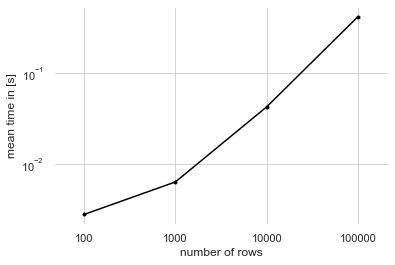

In [2]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #fig.set_size_inches(8, 10)
    ax.axis('equal')
    #plt.locator_params("y", numticks=12)
    #major_ticks = [0.001, 0.01, 0.1, 1., 10.][:len(run_row_numbers)]
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

Defined plot_runtimes_all, example output:


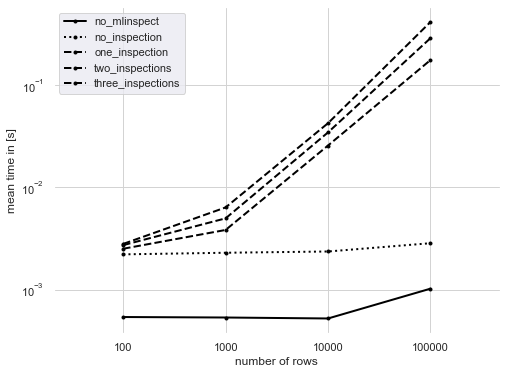

In [3]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    fig.set_size_inches(8, 6)
    ax.axis('equal')
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

Defined box_plot_full_pipeline_results, example output:


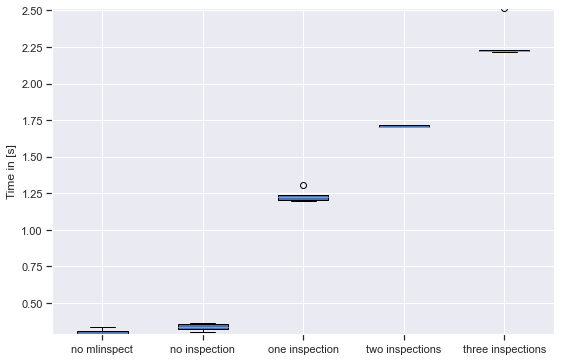

In [14]:
def box_plot_full_pipeline_results(benchmark_results, name, save_to_file=False):    
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)
    
    ## add patch_artist=True option to ax.boxplot() 
    ## to get fill color
    data_to_plot = benchmark_results.values()
    bp = ax.boxplot(data_to_plot, patch_artist=True)

    ## change outline color, fill color and linewidth of the boxes
    #for box in bp['boxes']:
    #    # change outline color
    #    box.set( color='#7570b3', linewidth=2)
        # change fill color
    #    box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    #for whisker in bp['whiskers']:
    #    whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    #for cap in bp['caps']:
    #    cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    #for median in bp['medians']:
    #    median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    #for flier in bp['fliers']:
    #    flier.set(marker='o', color='#e7298a', alpha=0.5)
        
    ## Custom x-axis labels
    ax.set_xticklabels(benchmark_results.keys())
    
    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    ax.set_ylabel('Time in [s]')
    
    ax.autoscale(enable=True, tight=True)

    # Save the figure
    if save_to_file:
        fig.savefig(result_file_name + '.svg', bbox_inches='tight')
    plt.show()
    plt.close()

print('Defined box_plot_full_pipeline_results, example output:')
test_benchmark_results = {
    "no mlinspect": [0.3328154240000458, 0.29041089500003636, 0.28595826900004795, 0.30949507700006507, 0.2908414740001035],
    "no inspection": [0.3638599429999658, 0.334859200999972, 0.35457435500006795, 0.3023559349999232, 0.3244804189999968],
    "one inspection": [1.1991266320000022, 1.2222170320000032, 1.309182582999938, 1.2018000110000457, 1.2360804480000525],
    "two inspections": [1.720092654000041, 1.7146672159999525, 1.7053870940000024, 1.7045333490000303, 1.7027777409999771],
    "three inspections": [2.2129864439999665, 2.2243778859999566, 2.2320164879999993, 2.2251516389999324, 2.5162970650000034]
}
box_plot_full_pipeline_results(test_benchmark_results, "test_box_plot_full_pipeline_results")

In [4]:
def benchmark_op_instrumentation_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles, repeats):
    print("Instrumentation Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_instrumentation_benchmarks(row_number, op_type, repeats)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [5]:
def benchmark_op_inspections_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles, repeats):
    print("Inspection Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_inspections_benchmarks(row_number, op_type, repeats)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [23]:
def benchmark_full_pipeline_and_plot_result(pipeline: PipelineBenchmarkType, repeats):
    print("Full Pipeline Execution Results for {}".format(pipeline.value))
    with io.capture_output() as captured:
        benchmark_results = do_full_pipeline_benchmarks(pipeline, repeats)
    mean_benchmark_results = {}
    for label, results in benchmark_results.items():
        mean_benchmark_results[label] = statistics.mean(results)
        
    print("Results")
    for label, results in benchmark_results.items():
        print("{}: {}".format(label, results))

    print("Mean Results")
    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
        
    box_plot_full_pipeline_results(benchmark_results, pipeline.value)

In [28]:
row_numbers = [100, 1000, 10000]
#row_numbers = [100, 1000, 10000, 100000]
#row_numbers = [100, 1000, 10000, 100000, 1000000]

repeats = 1
#repeats = 3
#repeats = 15

instrumentation_linestyles = {"no mlinspect": "solid", # Can be commented out to remove it from plot
    "no inspection": "dotted", 
    "one inspection": "dashed", 
    "two inspections": "dashed", 
    "three inspections": "dashed"}

inspection_linestyles = {"empty inspection": "solid",
    "MaterializeFirstRowsInspection(10)": "dotted", 
    "LineageInspection(10)": "dashed", 
    "HistogramInspection(['group_col'])": "dashdot"}

Instrumentation Results for projection
Done: 100
Done: 1000
Done: 10000
no mlinspect: [0.0008120879999999886, 0.0007089483999998869, 0.000607195399999938]
no inspection: [0.0034473309999999203, 0.0030241100000001353, 0.002499929400000056]
one inspection: [0.004150905000000193, 0.0053457140000000795, 0.0266753479000001]
two inspections: [0.004250928999999903, 0.005943006999999945, 0.03384996550000023]
three inspections: [0.0039535659999997644, 0.007019554399999972, 0.04231094339999988]


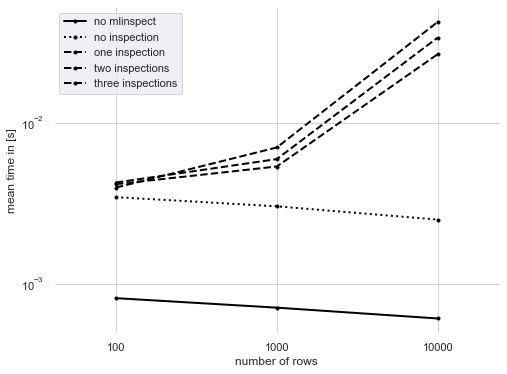

In [7]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.PROJECTION, instrumentation_linestyles, repeats)

Instrumentation Results for selection
Done: 100
Done: 1000
Done: 10000
no mlinspect: [0.0006848020999999704, 0.0004353832000003166, 0.0006243121000000685]
no inspection: [0.005673849800000319, 0.00489739440000001, 0.006299777799999617]
one inspection: [0.00905425299999969, 0.01219829929999996, 0.038627385100000036]
two inspections: [0.009102060700000436, 0.013476395999999901, 0.05581307529999968]
three inspections: [0.010379630700000142, 0.014886406499999793, 0.07050229960000003]


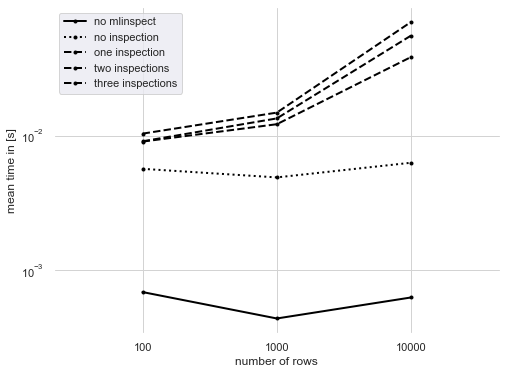

In [8]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.SELECTION, instrumentation_linestyles, repeats)

Instrumentation Results for join
Done: 100
Done: 1000
Done: 10000
no mlinspect: [0.002620048500000216, 0.0017915330000001007, 0.0034424887999996655]
no inspection: [0.006467308900000112, 0.006996533300000251, 0.010251434399999582]
one inspection: [0.01466959650000028, 0.01702174019999969, 0.05224401180000058]
two inspections: [0.014216855300000119, 0.018755563099999505, 0.06771725379999971]
three inspections: [0.014667083099999978, 0.020328818499999457, 0.08240343450000047]


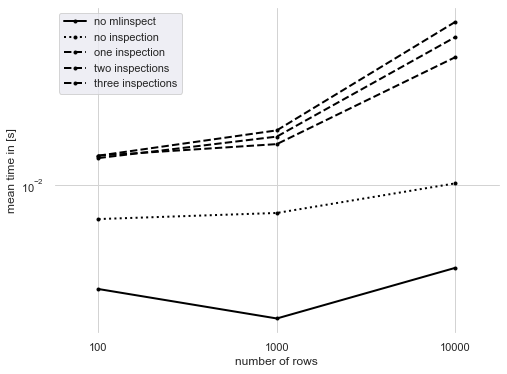

In [9]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.JOIN, instrumentation_linestyles, repeats)

Instrumentation Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
no mlinspect: [0.0006465446999996515, 0.0006858300999994071, 0.0026826529000000933]
no inspection: [0.002641828799999857, 0.002204008999999374, 0.0037786180000004776]
one inspection: [0.002294892000000104, 0.0039325231999995935, 0.01826299020000057]
two inspections: [0.0025482267000004554, 0.005121817799999917, 0.028879865900000468]
three inspections: [0.0026166863000003813, 0.005576460799999694, 0.037681142700000336]


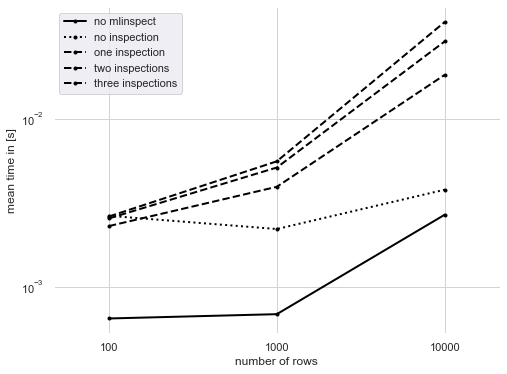

In [10]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, instrumentation_linestyles, repeats)

Instrumentation Results for standard_scaler
Done: 100
Done: 1000
Done: 10000
no mlinspect: [0.00297105399999964, 0.002321933700000045, 0.0025064430000007578]
no inspection: [0.004433941100000283, 0.003627008800000908, 0.0035593804999994203]
one inspection: [0.0039894478000000785, 0.005181444499999799, 0.018425471700000175]
two inspections: [0.00423558510000035, 0.007335151299999865, 0.028220021999999644]
three inspections: [0.004135069399999835, 0.007315697400000332, 0.037445660900000274]


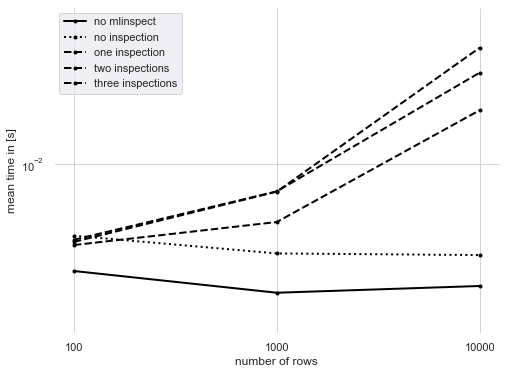

In [11]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.STANDARD_SCALER, instrumentation_linestyles, repeats)

Instrumentation Results for decision_tree
Done: 100
Done: 1000
Done: 10000
no mlinspect: [0.003255477899999093, 0.010109806999999905, 0.06509405730000069]
no inspection: [0.004634943200000663, 0.011442163499999224, 0.06396952639999895]
one inspection: [0.008534590199999314, 0.022505175999998527, 0.1432767802000015]
two inspections: [0.009135487700000767, 0.023467195499998185, 0.16252497800000115]
three inspections: [0.009383681199999928, 0.02414064370000162, 0.17016852690000092]


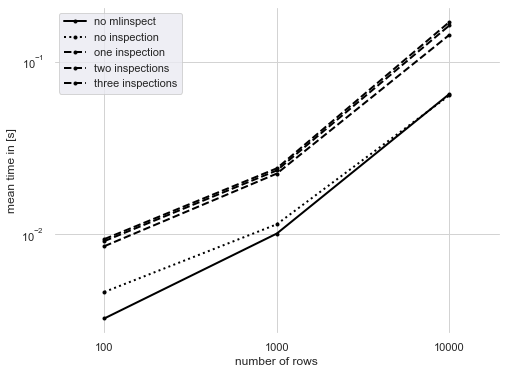

In [12]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.DECISION_TREE, instrumentation_linestyles, repeats)

Inspection Results for projection
Done: 100
Done: 1000
Done: 10000
empty inspection: [0.0034516408000001774, 0.003791905799999995, 0.020570043400000772]
MaterializeFirstRowsInspection(10): [0.002912437600001283, 0.0042232639999994605, 0.020006662199999425]
LineageInspection(10): [0.0029085224000013456, 0.004528206400000556, 0.021794726400001706]
HistogramInspection(['group_col']): [0.0025920333999991385, 0.0044517235999990135, 0.025445581000002448]


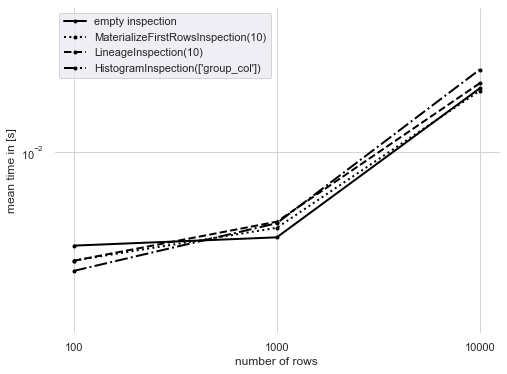

In [13]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.PROJECTION, inspection_linestyles, repeats)

Inspection Results for selection
Done: 100
Done: 1000
Done: 10000
empty inspection: [0.011259504800001707, 0.0111758774000009, 0.04150243339999804]
MaterializeFirstRowsInspection(10): [0.010309743800002024, 0.011620625199998357, 0.04276639499999959]
LineageInspection(10): [0.010317904599997974, 0.014338350400001332, 0.044458581400000696]
HistogramInspection(['group_col']): [0.008726750600003186, 0.012367484199998557, 0.05056863400000111]


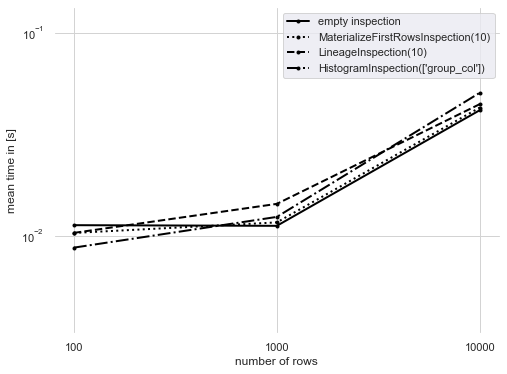

In [14]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.SELECTION, inspection_linestyles, repeats)

Inspection Results for join
Done: 100
Done: 1000
Done: 10000
empty inspection: [0.017201743999997632, 0.016937088999999617, 0.053744971999999794]
MaterializeFirstRowsInspection(10): [0.01521251600000113, 0.018962172800000586, 0.05554795359999787]
LineageInspection(10): [0.015934880399997554, 0.019187485399999104, 0.05961454640000028]
HistogramInspection(['group_col']): [0.014407882599999765, 0.018473998599999673, 0.05889153060000041]


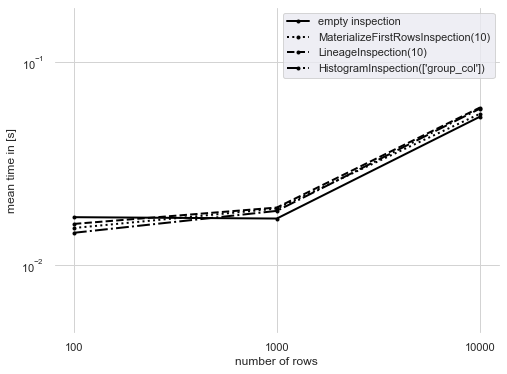

In [15]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.JOIN, inspection_linestyles, repeats)

Inspection Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
empty inspection: [0.0031454509999989, 0.0036337582000001587, 0.018639448400000445]
MaterializeFirstRowsInspection(10): [0.0032386543999990635, 0.004626864999998759, 0.019813194000001033]
LineageInspection(10): [0.0030129446000003667, 0.0044819875999976945, 0.020705228399998533]
HistogramInspection(['group_col']): [0.0024121764000028635, 0.004340255199998921, 0.025170740800000146]


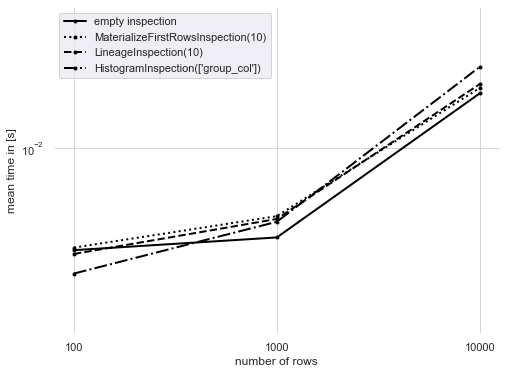

In [16]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, inspection_linestyles, repeats)

Full Pipeline Execution Results for healthcare (1000 rows)
Results
no mlinspect: [1.035223737000024, 0.9845591680000325, 0.9288053120001223]
no inspection: [1.0128424140000334, 1.0046521709998615, 1.0158889449999151]
one inspection: [1.0856988869998077, 1.0872446779999336, 1.0811475509999582]
two inspections: [1.1056265079998866, 1.138557229000071, 1.1065620580000086]
three inspections: [1.1383158439998624, 1.2450566590000562, 1.184622539999964]
Mean Results
no mlinspect: 0.9828627390000596
no inspection: 1.01112784333327
one inspection: 1.0846970386665664
two inspections: 1.1169152649999887
three inspections: 1.1893316809999608


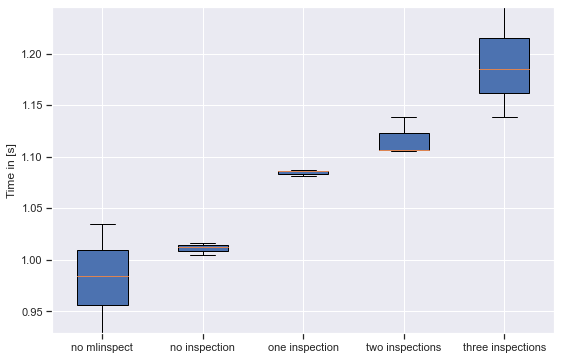

In [24]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.HEALTHCARE, repeats)

Full Pipeline Execution Results for compas (train: 5050 rows, test: 2166)
Results
no mlinspect: [0.1626225439999871, 0.1153696469998522, 0.0977848019999783]
no inspection: [0.16367354299995895, 0.1634936459997789, 0.16238855100004912]
one inspection: [0.6394883460000074, 0.5891154939999979, 0.6297104469999795]
two inspections: [0.7295275789999778, 0.6864943370001129, 0.6891854149998835]
three inspections: [0.8213997760001348, 0.9422276430000238, 0.9347997899999427]
Mean Results
no mlinspect: 0.12525899766660586
no inspection: 0.16318524666659565
one inspection: 0.6194380956666615
two inspections: 0.7017357769999913
three inspections: 0.8994757363333671


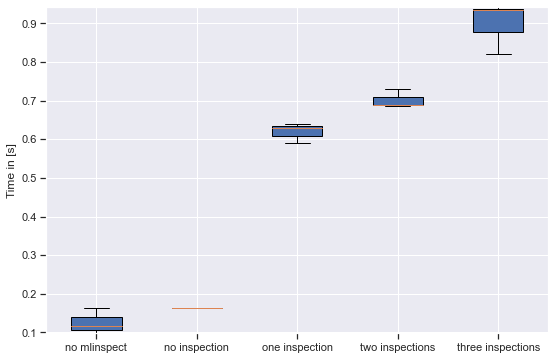

In [25]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.COMPAS, repeats)

Full Pipeline Execution Results for adult_easy (22793 rows)
Results
no mlinspect: [0.3417833700000301, 0.2854416330001186, 0.31491697900014515]
no inspection: [0.3473466529999314, 0.3209387740000693, 0.3716627219998827]
one inspection: [1.4288065329999426, 1.3791052280000713, 1.4760825270000169]
two inspections: [2.001272201999882, 2.1839709450000555, 1.9165582040000118]
three inspections: [2.3078132709999863, 2.405473562999987, 2.530709257999888]
Mean Results
no mlinspect: 0.31404732733343127
no inspection: 0.3466493829999611
one inspection: 1.4279980960000103
two inspections: 2.0339337836666496
three inspections: 2.4146653639999536


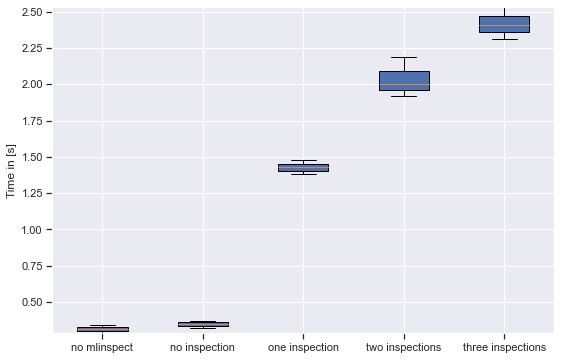

In [26]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.ADULT_EASY, repeats)

Full Pipeline Execution Results for adult_normal (train: 22793 rows, test: 9770 rows)
Results
no mlinspect: [0.5189623740000116, 0.6162710129999596, 0.606769407999991]
no inspection: [0.5998879240000861, 0.4905365829999937, 0.5558933259999321]
one inspection: [1.5454771589998018, 1.5648556270000427, 1.5578739410000253]
two inspections: [2.1742689279999468, 2.285765794000099, 2.1797037080000337]
three inspections: [2.9339243659999283, 2.8839115279999987, 2.703574066000101]
Mean Results
no mlinspect: 0.5806675983333207
no inspection: 0.548772611000004
one inspection: 1.5560689089999566
two inspections: 2.2132461433333597
three inspections: 2.840469986666676


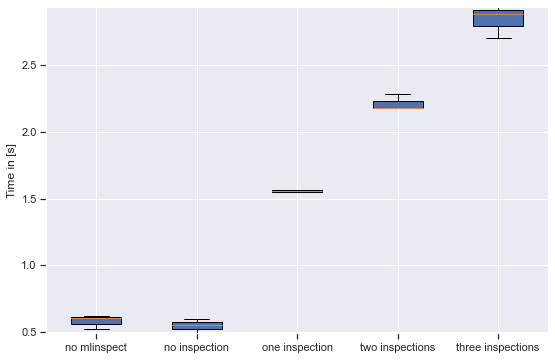

In [27]:
benchmark_full_pipeline_and_plot_result(PipelineBenchmarkType.ADULT_NORMAL, repeats)